In [1]:
# 앙상블을 구현해 보아요!
# 앙상블 - Voting을 Iris를 가지고 구현해 보아요!

# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

Matplotlib created a temporary config/cache directory at C:\Users\lee_0\AppData\Local\Temp\matplotlib-me_6l3_s because the default path (C:\Users\lee_0\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
# display(df)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target
# display(df)

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

In [3]:
# 위에서 정제한 데이터를 이용해서 각각의 Model을 만들어요!

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_data_train_norm, t_data_train)
knn_acc = accuracy_score(t_data_test, knn.predict(x_data_test_norm))
print(f'KNN 모델의 accuracy : {knn_acc}')

svm = SVC(kernel='linear',
          C=5)
svm.fit(x_data_train_norm, t_data_train)
svm_acc = accuracy_score(t_data_test, svm.predict(x_data_test_norm))
print(f'SVM 모델의 accuracy : {svm_acc}')

dt = DecisionTreeClassifier()
dt.fit(x_data_train_norm, t_data_train)
dt_acc = accuracy_score(t_data_test, dt.predict(x_data_test_norm))
print(f'Decision Tree 모델의 accuracy : {dt_acc}')

KNN 모델의 accuracy : 0.9777777777777777
SVM 모델의 accuracy : 1.0
Decision Tree 모델의 accuracy : 0.9777777777777777


In [4]:
# 우리 앙상블 모델을 만들어요!
# hard voting classifier(hvc)

hvc = VotingClassifier(estimators=[('KNN', knn),
                                   ('SVM', svm),
                                   ('DT', dt)],
                                   voting='hard')
hvc.fit(x_data_train_norm, t_data_train)
hvc_acc = accuracy_score(t_data_test, hvc.predict(x_data_test_norm))
print(f'ensemble 모델(hard voting)의 accuracy : {hvc_acc}')

ensemble 모델(hard voting)의 accuracy : 1.0


In [5]:
# 앙상블 bagging에 대해서 구현해 보아요!
# Decision Tree를 모아서 만든 Random Forest를 구현해 보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
# display(df)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target
# display(df)

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

dt = DecisionTreeClassifier()
dt.fit(x_data_train_norm, t_data_train)
dt_acc = accuracy_score(t_data_test, dt.predict(x_data_test_norm))
print(f'Decision Tree 모델의 accuracy : {dt_acc}')

rfc = RandomForestClassifier(n_estimators=50,
                             max_depth=3,
                             random_state=20)
rfc.fit(x_data_train_norm, t_data_train)
rfc_acc = accuracy_score(t_data_test, rfc.predict(x_data_test_norm))
print(f'RandomForest 모델의 accuracy : {rfc_acc}')

Decision Tree 모델의 accuracy : 0.9777777777777777
RandomForest 모델의 accuracy : 1.0


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
# display(df)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target
# display(df)

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

# model

xgb = XGBClassifier(n_estimators=50,
                    max_depth=3,
                    random_state=20)
xgb.fit(x_data_train_norm, t_data_train)
xgb_acc = accuracy_score(t_data_test, xgb.predict(x_data_test_norm))
print(f'XGB 모델의 accuracy : {xgb_acc}')

[10:14:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB 모델의 accuracy : 0.9555555555555556


c:\Users\lee_0\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [7]:
# 최초의 neural network => Perceptron
# 아주 간단하게 생각하면 logistic regression과 같아요!
# 대신에 activation 함수를 logistic은 sigmoid를 이용해요!
# 하지만 Perceptron은 activation함수로 step function을 사용해요!

# 이런 Perceptron은 각종 GATE연산을 학습할 수 있으면
# 이를 이용해서 AI를 만들 수 있겠다라고 당시에 생각했어요!
# 여기서 말하는 GATE연산은 (AND, OR, NOR, XOR, . . .)

# 우리도 Perceptron이 GATE연산을 학습할 수 있는지 확인하기 위해
# Logistic Regression을 이용해서 GATE연산을 학습해 볼꺼예요!

# Tensorflow Keras로 구현해 보아요!
# AND, OR, XOR 연산만 해 보아요!

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Training Data Set
x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]], dtype=np.float32)
# AND GATE에 대한 데이터
# t_data = np.array([[0], [0], [0], [1]], dtype=np.float32)
# OR GATE에 대한 데이터
# t_data = np.array([[0], [1], [1], [1]], dtype=np.float32)
# XOR GATE에 대한 데이터
t_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

model = Sequential()
model.add(Flatten(input_shape=(2,)))
model.add(Dense(units=1,
                activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['acc'])
model.fit(x_data,
          t_data,
          epochs=10000,
          verbose=0)

print(f'정확도는 : {model.evaluate(x_data, t_data)}')
# 정확도는 : [0.00037980571505613625, 1.0] => AND 연산에 대한 학습 결과
# 정확도는 : [0.00022676341177430004, 1.0] => OR 연산에 대한 학습 결과
# 정확도는 : [0.6931471824645996, 0.5] => XOR 연산에 대한 학습 결과

1/1 [==============================] - 0s 79ms/step - loss: 0.6931 - acc: 0.7500
정확도는 : [0.6931471824645996, 0.75]


In [8]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
# 이번에는 다중 layer perceptron을 이용해서 GATE연산을 학습해 볼꺼예요!

# Training Data Set
x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]], dtype=np.float32)
# AND GATE에 대한 데이터
# t_data = np.array([[0], [0], [0], [1]], dtype=np.float32)
# OR GATE에 대한 데이터
# t_data = np.array([[0], [1], [1], [1]], dtype=np.float32)
# XOR GATE에 대한 데이터
t_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

model = Sequential()
model.add(Flatten(input_shape=(2,)))  # Input Layer

# 여러개의 Hidden Layer
# Hidden Layer는 Dense Layer를 사용해요!
model.add(Dense(units=10,
                activation='relu'))
model.add(Dense(units=6,
                activation='relu'))

model.add(Dense(units=1,  # Output Layer
                activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['acc'])
model.fit(x_data,
          t_data,
          epochs=30000,
          verbose=0)

print(f'정확도는 : {model.evaluate(x_data, t_data)}')
# 정확도는 : [7.163678095167825e-09, 1.0] => AND 연산에 대한 학습 결과
# 정확도는 : [6.875959801533327e-09, 1.0] => OR 연산에 대한 학습 결과
# 정확도는 : [1.1167191615868433e-08, 1.0] => XOR 연산에 대한 학습 결과

1/1 [==============================] - 0s 48ms/step - loss: 1.3751e-08 - acc: 1.0000
정확도는 : [1.375103941825273e-08, 1.0]


In [9]:
# 기존에 실습에서 사용했던 MNIST 데이터셋을 두 가지 방식으로 구현해 볼꺼예요!

# 1. Logistic Regression을 이용해서 Multinomial Classification
# 2. DNN으로 Multinomial Classification 구현해 볼 꺼예요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
# Raw Data Loading
df = pd.read_csv(r"C:\Users\lee_0\Desktop\코딩\ML\12.07\train.csv")
# display(df)  # 42000 rows × 785 columns

# 결측치와 이상치가 없어요!
# Feature Enginerring을 할게 없어요!

# 독립변수(feature), 종속변수(target) 분리
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values  # 원래 one-hot 처리를 해야 해요!
                                        # 하지만 keras에게 one-hot 처리를 위임할 수 있어서
                                        # 따로 처리는 안할꺼예요!

# 정규화는 진행해야 해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train, test 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

# Model 구현(Regression Model 구현)
model = Sequential()

# Input Layer
model.add(Flatten(input_shape=(784,)))

# Output Layer
model.add(Dense(units=10,
                activation='softmax'))
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# Model 학습
history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.2,
                    verbose=1)

# Model 평가
print(model.evaluate(x_data_test_norm,
                     t_data_test))

Epoch 1/100
236/236 [==============================] - 0s 1ms/step - loss: 0.4198 - acc: 0.8778 - val_loss: 0.3145 - val_acc: 0.9087
Epoch 2/100
236/236 [==============================] - 0s 852us/step - loss: 0.2925 - acc: 0.9154 - val_loss: 0.2993 - val_acc: 0.9141
Epoch 3/100
236/236 [==============================] - 0s 753us/step - loss: 0.2738 - acc: 0.9217 - val_loss: 0.2926 - val_acc: 0.9192
Epoch 4/100
236/236 [==============================] - 0s 779us/step - loss: 0.2613 - acc: 0.9244 - val_loss: 0.3261 - val_acc: 0.9071
Epoch 5/100
236/236 [==============================] - 0s 773us/step - loss: 0.2533 - acc: 0.9262 - val_loss: 0.2950 - val_acc: 0.9155
Epoch 6/100
236/236 [==============================] - 0s 797us/step - loss: 0.2463 - acc: 0.9282 - val_loss: 0.3095 - val_acc: 0.9124
Epoch 7/100
236/236 [==============================] - 0s 774us/step - loss: 0.2385 - acc: 0.9303 - val_loss: 0.3011 - val_acc: 0.9139
Epoch 8/100
236/236 [==============================] - 0s

In [11]:
import tensorflow as tf

predict = tf.argmax(model.predict(x_data_test_norm), axis=1).numpy()
print(classification_report(t_data_test,
                            predict))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1240
           1       0.95      0.97      0.96      1405
           2       0.90      0.86      0.88      1253
           3       0.85      0.89      0.87      1305
           4       0.92      0.91      0.91      1222
           5       0.85      0.84      0.85      1139
           6       0.91      0.95      0.93      1241
           7       0.91      0.92      0.92      1320
           8       0.87      0.86      0.86      1219
           9       0.87      0.87      0.87      1256

    accuracy                           0.90     12600
   macro avg       0.90      0.90      0.90     12600
weighted avg       0.90      0.90      0.90     12600



In [12]:
# MNIST를 이용한 Deep Network으로 구현해 보아요

# Raw Data Loading
df = pd.read_csv(r"C:\Users\lee_0\Desktop\코딩\ML\12.07\train.csv")

# 결측치와 이상치가 없어요!
# Feature Enginerring을 할게 없어요!

# 독립변수(feature), 종속변수(target) 분리
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values  # 원래 one-hot 처리를 해야 해요!
                                        # 하지만 keras에게 one-hot처리를 위임할 수 있어서
                                        # 따로 처리는 안할꺼예요!

# 정규화는 진행해야 해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train, test 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

# Model 구현(Regression Model 구현)
model = Sequential()

# Input Layer
model.add(Flatten(input_shape=(784,)))

# Hidden Layer
model.add(Dense(units=256,
                activation='relu'))
model.add(Dense(units=128,
                activation='relu'))

# Output Layer
model.add(Dense(units=10,
                activation='softmax'))
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# model.summary()

# Model 학습
history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.2,
                    verbose=1)

# Model 평가
print(model.evaluate(x_data_test_norm,
                    t_data_test))

Epoch 1/100
236/236 [==============================] - 1s 2ms/step - loss: 0.3097 - acc: 0.9051 - val_loss: 0.1842 - val_acc: 0.9439
Epoch 2/100
236/236 [==============================] - 0s 2ms/step - loss: 0.1495 - acc: 0.9551 - val_loss: 0.1279 - val_acc: 0.9616
Epoch 3/100
236/236 [==============================] - 0s 2ms/step - loss: 0.1200 - acc: 0.9647 - val_loss: 0.1377 - val_acc: 0.9568
Epoch 4/100
236/236 [==============================] - 0s 2ms/step - loss: 0.1071 - acc: 0.9664 - val_loss: 0.1773 - val_acc: 0.9507
Epoch 5/100
236/236 [==============================] - 0s 2ms/step - loss: 0.0918 - acc: 0.9719 - val_loss: 0.1900 - val_acc: 0.9539
Epoch 6/100
236/236 [==============================] - 0s 2ms/step - loss: 0.0820 - acc: 0.9754 - val_loss: 0.1687 - val_acc: 0.9592
Epoch 7/100
236/236 [==============================] - 0s 2ms/step - loss: 0.0711 - acc: 0.9787 - val_loss: 0.2034 - val_acc: 0.9546
Epoch 8/100
236/236 [==============================] - 0s 2ms/step - 

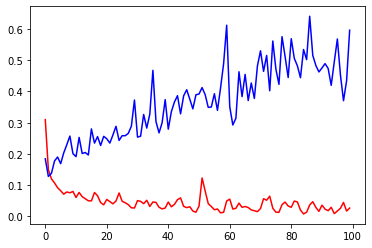

In [13]:
# 우리 Model이 잘 만들어진 모델인지 확인!!!
# 그래프를 이용해서 확인해보는게 좋아요!
# 학습할때 학습데이터로 loss, acc를 구하고
# validation data로 val_loss, val_acc를 구하게 되는데
# 이 두 그래프를 비교해보면 overfitting의 정도를 확인!

plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.show()

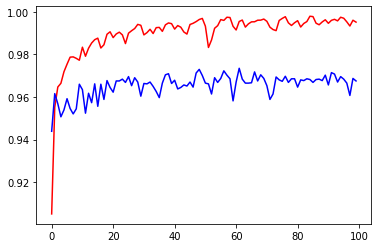

In [14]:
plt.plot(history.history['acc'], color='r')
plt.plot(history.history['val_acc'], color='b')
plt.show()

In [15]:
# MNIST를 이용한 Deep Network으로 구현해 보아요
# Tensorflow Keras가 제공하는 여러 기능이 있는데
# 그 중 필수적으로 사용하는 기능들이 있어요!
# 대표적인게 Early Stopping(조기종료) 기능이에요!

# Raw Data Loading
df = pd.read_csv(r"C:\Users\lee_0\Desktop\코딩\ML\12.07\train.csv")

# 결측치와 이상치가 없어요!
# Feature Enginerring을 할게 없어요!

# 독립변수(feature), 종속변수(target) 분리
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values  # 원래 one-hot 처리를 해야 해요!
                                       # 하짐나 keras에게 one-hot처리를 위임할 수 있어서
                                       # 따로 처리는 안할꺼예요!

# 정규화는 진행해야 해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train, test 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

# Model 구현(Regression Model 구현)
model = Sequential()

# Input Layer
model.add(Flatten(input_shape=(784,)))

# Hidden Layer
model.add(Dense(units=256,
                activation='relu'))
model.add(Dense(units=128,
                activation='relu'))

# Output Layer
model.add(Dense(units=10,
                activation='softmax'))
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# Early Stopping Callback 설정
from tensorflow.keras.callbacks import EarlyStopping

# monitor : 조기 종료의 기준
# patiece : loss값이 증가하는걸 몇번 참을 것 인가에 대한 숫자.
# 1 epoch val_loss : 0.1
# 2 epoch val_loss : 0.05
# 3 epoch val_loss : 0.04
# 4 epoch val_loss : 0.06 -1번 참자!!
# 5 epoch val_loss : 0.05 -2번 참자!!
# 6 epoch val_loss : 0.03
es_cb = EarlyStopping(monitor='val_loss',
                      patience=5,
                      restore_best_weights=True)

# model.summary()

# Model 학습
history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.2,
                    callbacks=[es_cb],
                    verbose=1)

# Model 평가
print(model.evaluate(x_data_test_norm,
                     t_data_test))

Epoch 1/100
236/236 [==============================] - 1s 2ms/step - loss: 0.3053 - acc: 0.9046 - val_loss: 0.1703 - val_acc: 0.9469
Epoch 2/100
236/236 [==============================] - 0s 2ms/step - loss: 0.1545 - acc: 0.9543 - val_loss: 0.1390 - val_acc: 0.9565
Epoch 3/100
236/236 [==============================] - 0s 2ms/step - loss: 0.1128 - acc: 0.9656 - val_loss: 0.1415 - val_acc: 0.9621
Epoch 4/100
236/236 [==============================] - 0s 2ms/step - loss: 0.1042 - acc: 0.9682 - val_loss: 0.1972 - val_acc: 0.9451
Epoch 5/100
236/236 [==============================] - 0s 2ms/step - loss: 0.0916 - acc: 0.9719 - val_loss: 0.1658 - val_acc: 0.9605
Epoch 6/100
236/236 [==============================] - 0s 2ms/step - loss: 0.0790 - acc: 0.9759 - val_loss: 0.1579 - val_acc: 0.9597
Epoch 7/100
394/394 [==============================] - 0s 600us/step - loss: 0.1546 - acc: 0.9563
[0.1546269804239273, 0.9563491940498352]
